In [1]:
import logging

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [5]:
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

In [6]:
print(train_df['ps_ind_01'].value_counts())
print(test_df['ps_ind_01'].value_counts())

ps_ind_01
0    187594
1    143984
2     82468
5     61464
3     51193
4     33524
6     17682
7     17303
Name: count, dtype: int64
ps_ind_01
0    281515
1    215941
2    123293
5     92199
3     76441
4     50521
6     26804
7     26102
Name: count, dtype: int64


In [8]:
print(train_df.head())
print(test_df.head())

   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1 

Text(0.5, 1.0, 'Training set distribution')

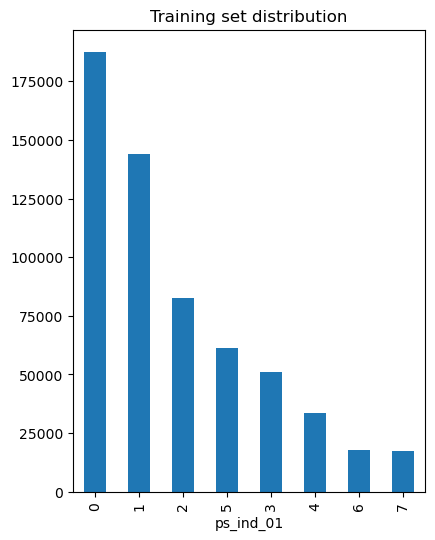

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
train_df['ps_ind_01'].value_counts().plot(kind='bar')
plt.title('Training set distribution')

Text(0.5, 1.0, 'Test set distribution')

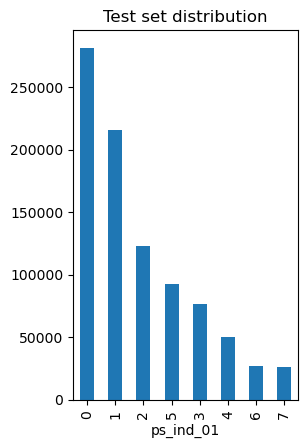

In [10]:
plt.subplot(1,2,2)
test_df['ps_ind_01'].value_counts().plot(kind='bar')
plt.title('Test set distribution')

In [11]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [12]:
import seaborn as sns

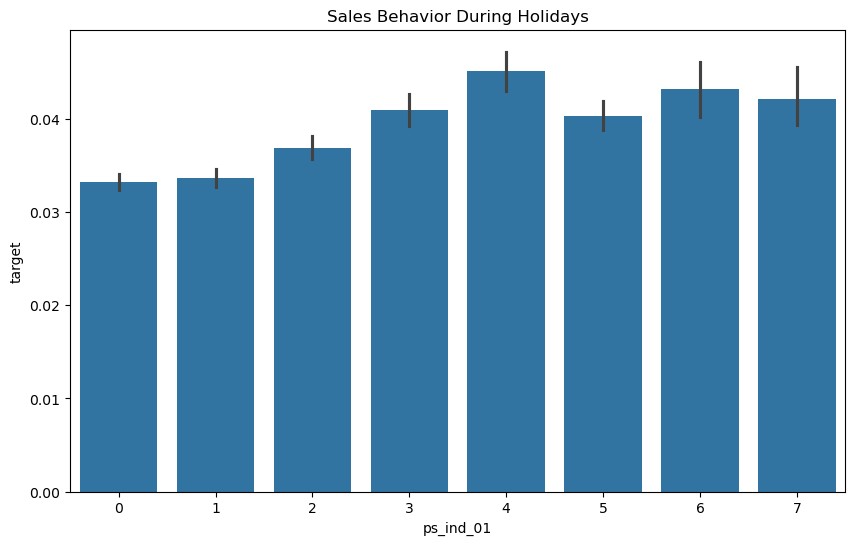

In [15]:
holiday_df = train_df[train_df['ps_ind_01'] == 1]
plt.figure(figsize=(10,6))
sns.barplot(x='ps_ind_01', y='target', data=train_df)
plt.title('Sales Behavior During Holidays')
plt.show()

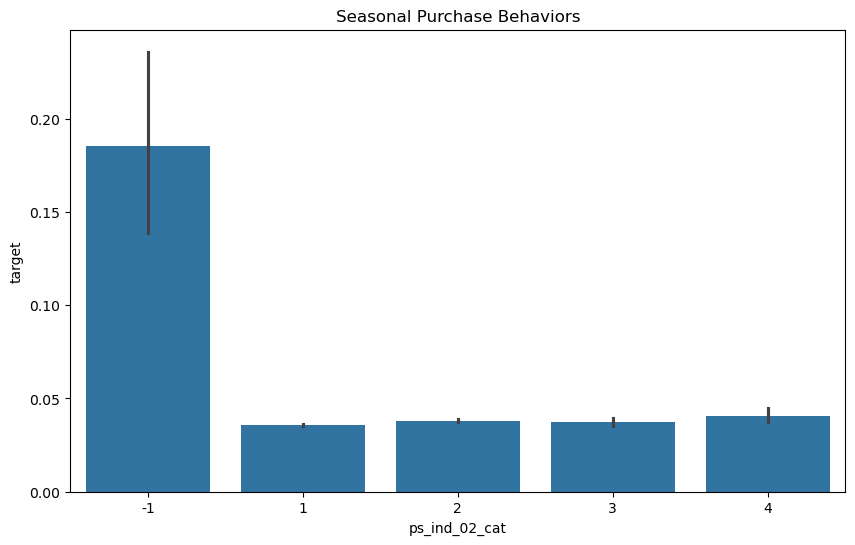

In [16]:
seasonal_df = train_df[train_df['ps_ind_02_cat'] == 1]
plt.figure(figsize=(10,6))
sns.barplot(x='ps_ind_02_cat', y='target', data=train_df)
plt.title('Seasonal Purchase Behaviors')
plt.show()

In [17]:
corr_matrix = train_df.corr()
print(corr_matrix['target'].sort_values(ascending=False))

target            1.000000
ps_car_13         0.053899
ps_car_12         0.038790
ps_ind_17_bin     0.037053
ps_reg_02         0.034800
ps_ind_07_bin     0.034218
ps_car_04_cat     0.032900
ps_car_03_cat     0.032401
ps_reg_03         0.030888
ps_ind_05_cat     0.029165
ps_car_15         0.027667
ps_reg_01         0.022888
ps_car_05_cat     0.020754
ps_ind_01         0.018570
ps_car_01_cat     0.016256
ps_ind_08_bin     0.013147
ps_car_06_cat     0.011537
ps_ind_04_cat     0.009360
ps_ind_03         0.008360
ps_ind_12_bin     0.007810
ps_ind_14         0.007443
ps_car_11_cat     0.006129
ps_car_09_cat     0.005322
ps_ind_18_bin     0.004555
ps_ind_02_cat     0.004534
ps_ind_13_bin     0.002460
ps_ind_11_bin     0.002028
ps_calc_03        0.001907
ps_ind_10_bin     0.001815
ps_calc_01        0.001782
ps_calc_14        0.001362
ps_calc_02        0.001360
ps_calc_10        0.001061
ps_car_10_cat     0.001038
ps_calc_05        0.000771
ps_calc_09        0.000719
ps_calc_16_bin    0.000624
p

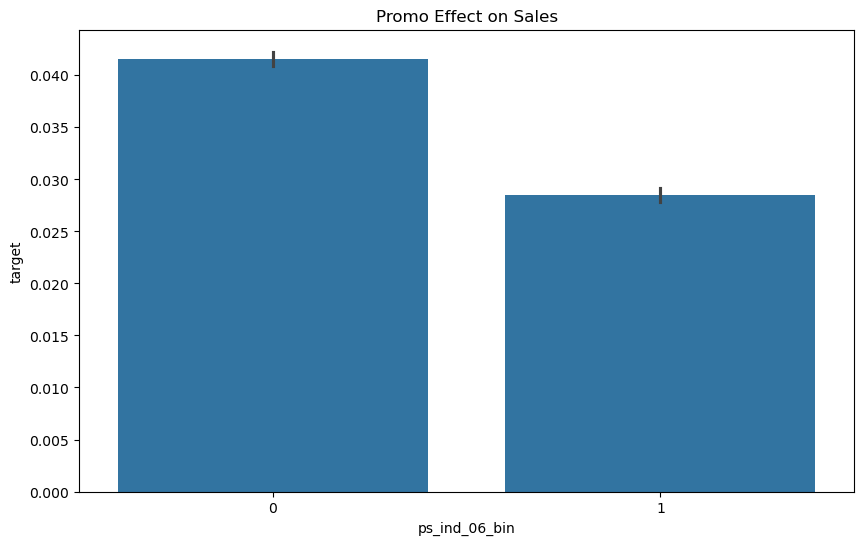

In [18]:
promo_df = train_df[train_df['ps_ind_06_bin'] == 1]
plt.figure(figsize=(10,6))
sns.barplot(x='ps_ind_06_bin', y='target', data=train_df)
plt.title('Promo Effect on Sales')
plt.show()

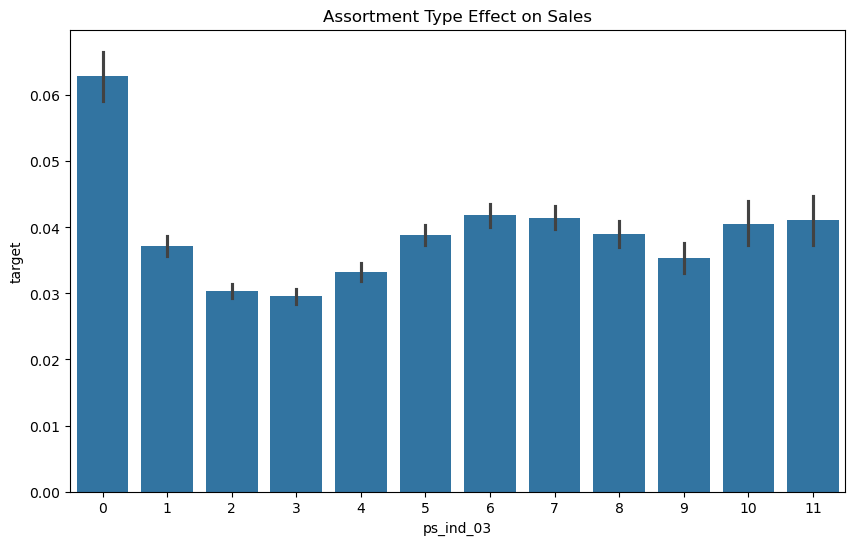

In [19]:
assortment_df = train_df[train_df['ps_ind_03'] == 1]
plt.figure(figsize=(10,6))
sns.barplot(x='ps_ind_03', y='target', data=train_df)
plt.title('Assortment Type Effect on Sales')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [21]:
X = train_df.drop(['target'], axis=1)
y = train_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [23]:
logger = logging.getLogger(__name__)


In [24]:
logger.setLevel(logging.INFO)


In [25]:
file_handler = logging.FileHandler('sales_prediction.log')
file_handler.setLevel(logging.INFO)

In [26]:
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

In [27]:
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

In [28]:
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

In [29]:
logger.addHandler(file_handler)
logger.addHandler(console_handler)


In [30]:
logger.info('Starting sales prediction task')


2025-10-20 13:01:26,471 - __main__ - INFO - Starting sales prediction task


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [32]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [33]:
logger.info('Loaded training and testing data')

2025-10-20 13:03:41,001 - __main__ - INFO - Loaded training and testing data


In [34]:
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

In [35]:
logger.info('Handled missing values')


2025-10-20 13:03:55,148 - __main__ - INFO - Handled missing values


In [36]:
X = train_df.drop(['target'], axis=1)
y = train_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
logger.info('Split data into training and testing sets')


2025-10-20 13:04:09,688 - __main__ - INFO - Split data into training and testing sets


In [42]:
import logging
from sklearn.ensemble import RandomForestRegressor

In [48]:
!pip install tensorflow


In [81]:
from datetime import datetime


In [82]:
# Assuming the time series data is not available, we'll use the 'target' column
time_series_data = train_df[['target']]

In [62]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
import pandas as pd

In [67]:
time_series_data_diff = time_series_data.diff().dropna()

In [76]:
import datetime
import pickle

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pickle
import datetime

In [80]:
# Define a simple model (e.g., a RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


In [ ]:
model.fit(train_df.drop('target', axis=1), train_df['target'])

In [ ]:
timestamp = datetime.datetime.now().strftime('%m-%d-%Y-%H-%M-%S')
with open(f'{timestamp}.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
sm.graphics.tsa.plot_acf(time_series_data_diff['target'], lags=20)
sm.graphics.tsa.plot_pacf(time_series_data_diff['target'], lags=20)


In [ ]:
def create_supervised_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 7
X, y = create_supervised_data(time_series_data_diff['target'], window_size)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).reshape(y.shape)


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
X_scaled = X_scaled.reshape(X_scaled.shape[0], window_size, 1)

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pickle
import datetime


In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
model = RandomForestRegressor()


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import pickle
from datetime import datetime
import os

In [ ]:
@st.cache_resource
def load_model():
    with open("model.pkl", "rb") as f:
        model = pickle.load(f)
    return model

model = load_model()

In [ ]:
st.title("Store Sales and Customer Prediction Dashboard")
st.write("Enter store details and upload data to predict sales and customer numbers.")

In [ ]:
st.sidebar.header("Input Parameters")

In [ ]:
store_id = st.sidebar.text_input("Store ID", "1")

In [ ]:
store_size = st.sidebar.number_input("Store Size (sq ft)", min_value=0, value=1000)
location_type = st.sidebar.selectbox("Location Type", ["Urban", "Suburban", "Rural"])

In [ ]:
uploaded_file = st.sidebar.file_uploader("Upload CSV file", type=["csv"])
if uploaded_file:
    input_data = pd.read_csv(uploaded_file)
    required_columns = ["Date", "IsHoliday", "IsWeekend", "IsPromo"]

In [ ]:
if not all(col in input_data.columns for col in required_columns):
        st.error(f"CSV must contain columns: {', '.join(required_columns)}")
    else:
        # Preprocess input data
        input_data["Date"] = pd.to_datetime(input_data["Date"])
        input_data["DayOfWeek"] = input_data["Date"].dt.dayofweek
        input_data["Month"] = input_data["Date"].dt.month

In [ ]:
input_data["Store_ID"] = store_id
        input_data["Store_Size"] = store_size
        input_data["Location_Type"] = location_type

In [ ]:
input_data = pd.get_dummies(input_data, columns=["Location_Type"], prefix="Loc")

In [ ]:
feature_columns = ["Store_ID", "IsHoliday", "IsWeekend", "IsPromo", 
                          "DayOfWeek", "Month", "Store_Size", 
                          "Loc_Urban", "Loc_Suburban", "Loc_Rural"]

In [ ]:
for col in feature_columns:
            if col not in input_data.columns:
                input_data[col] = 0

In [ ]:
X = input_data[feature_columns]

In [ ]:
try:
            predictions = model.predict(X)
            input_data["Predicted_Sales"] = predictions[:, 0]  # Assuming model outputs [sales, customers]
            input_data["Predicted_Customers"] = predictions[:, 1]

In [ ]:
st.subheader("Prediction Results")
            st.dataframe(input_data[["Date", "Predicted_Sales", "Predicted_Customers"]])
            
            # Plot predictions
            fig = px.line(input_data, x="Date", y=["Predicted_Sales", "Predicted_Customers"],
                         title="Predicted Sales and Customer Numbers",
                         labels={"value": "Amount/Count", "variable": "Metric"})
            st.plotly_chart(fig)
            

In [ ]:
csv = input_data[["Date", "Predicted_Sales", "Predicted_Customers"]].to_csv(index=False)
            st.download_button(
                label="Download Predictions as CSV",
                data=csv,
                file_name="predictions.csv",
                mime="text/csv"
            )
        
        except Exception as e:
            st.error(f"Error making predictions: {str(e)}")
else:
    st.info("Please upload a CSV file to get predictions.")